## Курсовой проект 

**Задача**

Для Занятия 1 требуется выполнить пп 1-3 построения модели классификации

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

### Примерное описание этапов выполнения курсового проекта<a class="anchor" id="course_project_steps"></a>

**Построение модели классификации**
1. Обзор обучающего датасета - **!**
2. Обработка выбросов - **!**
3. Обработка пропусков - **!**
4. Анализ данных
5. Отбор признаков
6. Балансировка классов
7. Подбор моделей, получение бейзлана
8. Выбор наилучшей модели, настройка гиперпараметров
9. Проверка качества, борьба с переобучением
10. Интерпретация результатов


**Подключение библиотек и скриптов**

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

**Пути к директориям и файлам**

In [10]:
# input
DATASET_PATH = 'course_project_train.csv'
# output
PREP_DATASET_PATH = 'course_project_train_prep.csv'

**Загрузка данных**

In [11]:
df = pd.read_csv(DATASET_PATH)

**Обзор данных**

In [12]:
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [14]:
df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

выборка разбалансирована (отрицательное значение целевой переменной встречается чаще положительного более чем в 2 раза 

In [15]:
df.iloc[0]

Home Ownership                            Own Home
Annual Income                               482087
Years in current job                           NaN
Tax Liens                                        0
Number of Open Accounts                         11
Years of Credit History                       26.3
Maximum Open Credit                         685960
Number of Credit Problems                        1
Months since last delinquent                   NaN
Bankruptcies                                     1
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                          1e+08
Current Credit Balance                       47386
Monthly Debt                                  7914
Credit Score                                   749
Credit Default                                   0
Name: 0, dtype: object

In [16]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [17]:
for cat_colname in df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

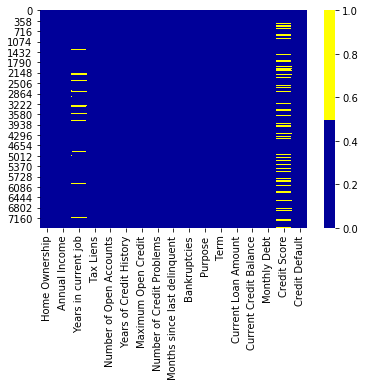

In [35]:
#Посмотрим на пропущенные данные
cols = df.columns
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap = sns.color_palette(colours))

явно виден лидер - **Months since last delinquent** - количество месяцев с последней просрочки платежа. Очевидно, что незаполненные - просто без просрочки. Заполним нулями

In [19]:
df['Months since last delinquent'].fillna(value = 0, inplace = True)

посмотрим на следующий - **Annual Income** - годовой доход.

count     7500.000000
mean      1325.285733
std        756.755138
min        164.597000
25%        931.133000
50%       1168.386000
75%       1499.974000
max      10149.344000
Name: Annual Income, dtype: float64

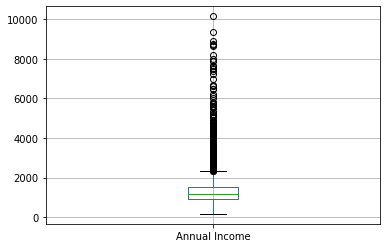

In [44]:
df.boxplot(column = ['Annual Income'])
df['Annual Income'].describe()

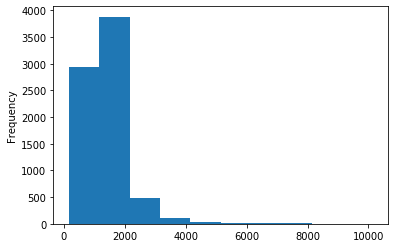

In [43]:
df['Annual Income'].plot(kind='hist')

очень некрасиво конечно... кроме медианы пока в голову ничего не приходит, но нужно вернуться к годовому доходу, есть пара идей. Пока медиана. И в int потом. И в килорубли (?или доллары)

In [42]:
df['Annual Income'].fillna(value = df['Annual Income'].median(), inplace = True)
df['Annual Income'] = df['Annual Income'].astype(int)/1000

посмотим снова

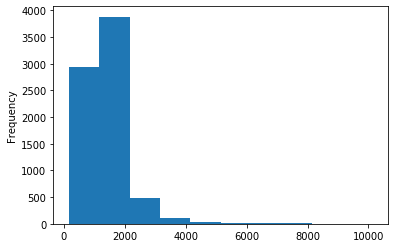

In [45]:
df['Annual Income'].plot(kind='hist')

Просто ради интереса, какие кредиты берут люди с доходом от 6 млн

In [48]:
df[df['Annual Income'] > 6000]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
1025,Rent,8923.844,3 years,0.0,15.0,17.2,1452000.0,0.0,0.0,0.0,debt consolidation,Short Term,670428.0,1084710.0,62095.0,723.0,0
1601,Rent,7999.095,10+ years,0.0,15.0,15.0,6286192.0,0.0,30.0,0.0,debt consolidation,Short Term,762762.0,2540756.0,65059.0,715.0,0
1615,Own Home,6651.900,10+ years,0.0,13.0,25.1,2155868.0,0.0,0.0,0.0,debt consolidation,Long Term,314380.0,1623569.0,110311.0,719.0,0
1616,Home Mortgage,7907.382,10+ years,1.0,8.0,26.0,1372536.0,1.0,0.0,0.0,home improvements,Long Term,763004.0,736117.0,25831.0,732.0,0
1984,Home Mortgage,8758.449,10+ years,0.0,10.0,20.6,0.0,0.0,0.0,0.0,home improvements,Short Term,99999999.0,2759503.0,12919.0,748.0,0
2200,Rent,9338.880,10+ years,0.0,7.0,7.3,1092608.0,0.0,0.0,0.0,business loan,Short Term,788480.0,326496.0,40546.0,720.0,0
2474,Home Mortgage,8633.790,2 years,0.0,13.0,15.6,1091200.0,0.0,36.0,0.0,debt consolidation,Long Term,777546.0,765244.0,25038.0,679.0,0
2606,Home Mortgage,7883.442,9 years,0.0,22.0,31.3,2262436.0,0.0,5.0,0.0,debt consolidation,Short Term,608542.0,879263.0,60834.0,746.0,0
3081,Rent,7381.842,7 years,0.0,5.0,10.3,789492.0,0.0,0.0,0.0,buy house,Long Term,767074.0,149321.0,13041.0,673.0,0
3269,Rent,6133.922,9 years,0.0,6.0,13.6,424864.0,0.0,17.0,0.0,home improvements,Short Term,152504.0,208050.0,40637.0,740.0,0


Current Loan Amount - много выбросов, вернемся к ней потом. Вцелом - нужно посмотреть на тестовую выборку и если годовые доходы там не такие экстремальные - убрать эти записи (решить, начиная с какого значения).

посмотрим на следующий - **Years in current job** - количество лет на текущем месте работы. Он категориальный. Два варианта: либо приводить его к числовому, затем проставлять медиану у пустых, либо вычислять медиану и превращать значение в категорийное (+ years). Наверное лучше будет оставить категории - пойдем вторым путем 

In [41]:
print(df['Years in current job'].describe())
df['Years in current job'].value_counts()

count          7129
unique           11
top       10+ years
freq           2332
Name: Years in current job, dtype: object


10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [49]:
#Приведем объект к строке
df['Years in current job'] = df['Years in current job'].astype(str)

In [61]:
df['Years in current job'].value_counts() 

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
nan           371
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [67]:
#добавим колонку с числовым значением стажа
df['Years in current job (int)'] = pd.to_numeric(df['Years in current job'].str.replace('\D', ''))

In [73]:
#заполним медианой
years_in_current_job_med = int(df['Years in current job (int)'].median())
df['Years in current job (int)'].fillna(value = years_in_current_job_med, inplace = True)

In [76]:
#вернем обратно только те, которые были NAN, чтобы не мучаться с > <. Медиана > 1, смело добавляем 'years'
df.loc[df['Years in current job'] == 'nan', 'Years in current job'] = str(years_in_current_job_med) + ' years'

In [77]:
df['Years in current job'].value_counts() 

10+ years    2332
6 years       797
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

красота... Теперь следующий - **Credit Score** - по нему нет описание, скорее всего это кредитный рейтинг

count    5943.000000
mean     1151.087498
std      1604.451418
min       585.000000
25%       711.000000
50%       731.000000
75%       743.000000
max      7510.000000
Name: Credit Score, dtype: float64

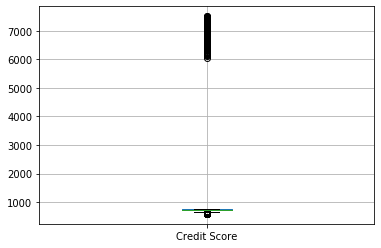

In [78]:
df.boxplot(column = ['Credit Score'])
df['Credit Score'].describe()

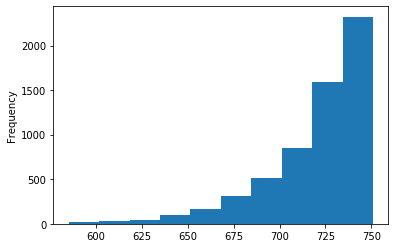

In [87]:
df['Credit Score'].plot(kind='hist')

In [84]:
df.loc[df['Credit Score'] > 1000, 'Credit Score'].value_counts()

7400.0    15
7300.0    13
7330.0    13
7170.0    12
7370.0    12
          ..
6830.0     1
6910.0     1
6450.0     1
6610.0     1
6170.0     1
Name: Credit Score, Length: 110, dtype: int64

ну явно ноль лишний.. Иначе были бы значения в диапазоне от 1000 до 6000. Скорее всего для Credit Score 1000 - потолок

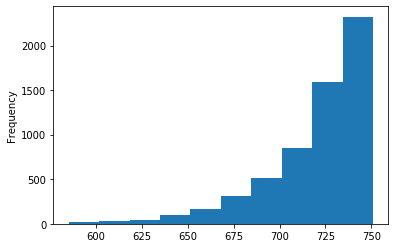

In [90]:
df.loc[df['Credit Score'] > 1000, 'Credit Score'] /= 10
df['Credit Score'].plot(kind='hist')

In [ ]:
ммм, красота.. Теперь NaN по медиане

In [91]:
df['Credit Score'].fillna(value = df['Credit Score'].median(), inplace = True)

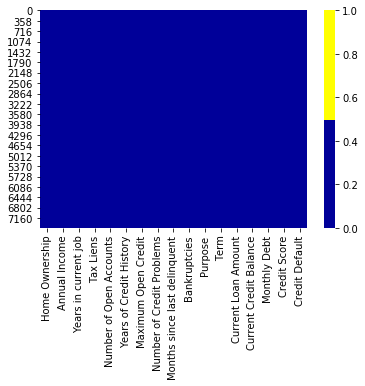

In [92]:
sns.heatmap(df[cols].isnull(), cmap = sns.color_palette(colours))

**(12.07.2020)** - пока все, остальные задачи буду догонять в течение недели. Краткий итог - датасет обзорно изучен, пропуски заполнены. Не сделано: не устранены все выбросы + не учитывал данные тестового датасет